<a href="https://colab.research.google.com/github/amnamalik1993/Two-Datasets/blob/main/Project_2_Part_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [74]:
# Loading Data

df = pd.read_csv('https://docs.google.com/spreadsheets/d/e/2PACX-1vQwT4Q_Hiezgbu98UOI6Qb9BbkmnK8ghZ7-xowBNpr2_h2CHcE9JJNC4vzyAs4rxdRlIdmYCFBoldlj/pub?output=csv')
df.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [50]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


## **Data Cleaning**

Delete unnecessary columns.

In [51]:
df.drop(columns = ['id','ever_married'], inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   gender             5110 non-null   object 
 1   age                5110 non-null   float64
 2   hypertension       5110 non-null   int64  
 3   heart_disease      5110 non-null   int64  
 4   work_type          5110 non-null   object 
 5   Residence_type     5110 non-null   object 
 6   avg_glucose_level  5110 non-null   float64
 7   bmi                4909 non-null   float64
 8   smoking_status     5110 non-null   object 
 9   stroke             5110 non-null   int64  
dtypes: float64(3), int64(3), object(4)
memory usage: 399.3+ KB


In [52]:
df.shape

(5110, 10)

Delete duplicate rows.

In [53]:
# Checking if we have any duplicates

df.duplicated().sum()

0

Identify and address missing values.

In [54]:
df.isna().sum()

gender                 0
age                    0
hypertension           0
heart_disease          0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64

In [55]:
# % of missing data in this dataset
df.isna().sum() / len(df) * 100

gender               0.000000
age                  0.000000
hypertension         0.000000
heart_disease        0.000000
work_type            0.000000
Residence_type       0.000000
avg_glucose_level    0.000000
bmi                  3.933464
smoking_status       0.000000
stroke               0.000000
dtype: float64

3.93% of data is missing from the data. We going to drop the missing values as this will not effect the dataset as much.

In [56]:
df.dropna(inplace = True)
df.isna().sum()

gender               0
age                  0
hypertension         0
heart_disease        0
work_type            0
Residence_type       0
avg_glucose_level    0
bmi                  0
smoking_status       0
stroke               0
dtype: int64

Identify and correct inconsistencies in data for categorical values (i.e. Cat, cat, cats).

In [57]:
# Inspecting and addressing inconsistencies in categorical data
data_types = df.dtypes
str_cols = data_types[data_types=='object'].index
str_cols

Index(['gender', 'work_type', 'Residence_type', 'smoking_status'], dtype='object')

In [58]:
for col in str_cols:
    print(f'- {col}:')
    print(df[col].value_counts(dropna=False))
    print("\n\n")

- gender:
Female    2897
Male      2011
Other        1
Name: gender, dtype: int64



- work_type:
Private          2811
Self-employed     775
children          671
Govt_job          630
Never_worked       22
Name: work_type, dtype: int64



- Residence_type:
Urban    2490
Rural    2419
Name: Residence_type, dtype: int64



- smoking_status:
never smoked       1852
Unknown            1483
formerly smoked     837
smokes              737
Name: smoking_status, dtype: int64





In [59]:
work_type_map = {'children':'Children','Self-employed':'Self_Employed','Govt_job':'Govt_Job','Never_worked':'Never_Worked'}

df['work_type'] = df['work_type'].replace(work_type_map)
df['work_type'].value_counts()

Private          2811
Self_Employed     775
Children          671
Govt_Job          630
Never_Worked       22
Name: work_type, dtype: int64

In [60]:
smoking_status_map = {'never smoked':'Never_Smoked','formerly smoked':'Formerly_Smoked','smokes':'Smokes'}

df['smoking_status'] = df['smoking_status'].replace(smoking_status_map)
df['smoking_status'].value_counts()

Never_Smoked       1852
Unknown            1483
Formerly_Smoked     837
Smokes              737
Name: smoking_status, dtype: int64

The categorical data is consistent now. Moving on to the numerical data

In [61]:
data_types = df.dtypes
num_cols = data_types[data_types !='object'].index
num_cols

Index(['age', 'hypertension', 'heart_disease', 'avg_glucose_level', 'bmi',
       'stroke'],
      dtype='object')

In [62]:
for col in num_cols:
    print(f'Column = {col}')
    print(df[col].sort_values(ascending=False))
    print('\n\n')

Column = age
2314    82.00
670     82.00
4819    82.00
2341    82.00
3603    82.00
        ...  
3968     0.16
4021     0.16
3618     0.16
1614     0.08
3295     0.08
Name: age, Length: 4909, dtype: float64



Column = hypertension
759     1
3677    1
3578    1
1775    1
1776    1
       ..
1838    0
1835    0
1834    0
1833    0
5109    0
Name: hypertension, Length: 4909, dtype: int64



Column = heart_disease
0       1
636     1
2433    1
923     1
2122    1
       ..
1788    0
1787    0
1786    0
1784    0
5109    0
Name: heart_disease, Length: 4909, dtype: int64



Column = avg_glucose_level
193     271.74
1207    267.76
3088    267.61
4983    267.60
2462    266.59
         ...  
772      55.26
682      55.25
4110     55.23
1191     55.22
4886     55.12
Name: avg_glucose_level, Length: 4909, dtype: float64



Column = bmi
2128    97.6
4209    92.0
928     78.0
544     71.9
1559    66.8
        ... 
922     12.3
657     12.0
2187    11.5
3307    11.3
1609    10.3
Name: bmi, Length: 

In [63]:
df['age'].sort_values(ascending = True)

3295     0.08
1614     0.08
3968     0.16
3618     0.16
4021     0.16
        ...  
3400    82.00
2979    82.00
3422    82.00
1068    82.00
2453    82.00
Name: age, Length: 4909, dtype: float64

It is evident that some rows of ages less than 1. We will going to investigate more and see decide what the course of treatment should be of this.

In [64]:
df.loc[df['age'] < 1]

,gender,age,hypertension,heart_disease,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
363,Female,0.64,0,0,Children,Urban,83.82,24.9,Unknown,0
376,Female,0.88,0,0,Children,Rural,88.11,15.5,Unknown,0
564,Female,0.32,0,0,Children,Rural,73.71,16.2,Unknown,0
982,Male,0.88,0,0,Children,Rural,157.57,19.2,Unknown,0
996,Male,0.24,0,0,Children,Rural,118.87,16.3,Unknown,0
1093,Female,0.32,0,0,Children,Rural,55.86,16.0,Unknown,0
1206,Female,0.72,0,0,Children,Urban,66.36,23.0,Unknown,0
1317,Male,0.80,0,0,Children,Rural,98.67,17.5,Unknown,0
1600,Male,0.40,0,0,Children,Urban,109.56,14.3,Unknown,0
1614,Female,0.08,0,0,Children,Urban,139.67,14.1,Unknown,0


In [65]:
df.loc[df['age'] < 1].value_counts().sum()

42

Going to round these ages to nearest integar. 

In [68]:
df['age'] = df['age'].round()

In [69]:
df.loc[df['age'] == 0].value_counts().sum()

19

In [70]:
df = df[df.age != 0]
df.loc[df['age'] == 0].value_counts().sum()

0

There are 19 ages that have rounded to zero. I will not drop these as they may cause data loss. However I will change the data type from float to integar as ages are whole numbers.

In [72]:
df['age'] = df['age'].astype(int)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4890 entries, 0 to 5109
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   gender             4890 non-null   object 
 1   age                4890 non-null   int64  
 2   hypertension       4890 non-null   int64  
 3   heart_disease      4890 non-null   int64  
 4   work_type          4890 non-null   object 
 5   Residence_type     4890 non-null   object 
 6   avg_glucose_level  4890 non-null   float64
 7   bmi                4890 non-null   float64
 8   smoking_status     4890 non-null   object 
 9   stroke             4890 non-null   int64  
dtypes: float64(2), int64(4), object(4)
memory usage: 420.2+ KB


The data is clean and all inconsistencies are addressed. 

## **Univariate Visuals for the Target and all Features**

### **Defining Target Vector (y):**  **stroke**



### **Defining Features (X)**: **gender, age, hypertenion, heart_disease, work_type, Residence_type, avg_glucose_level, bmi and smoking_status**

In [76]:
# Importing Libraries needed for visualizations

import matplotlib.pyplot as plt
import seaborn as sns

<Axes: >

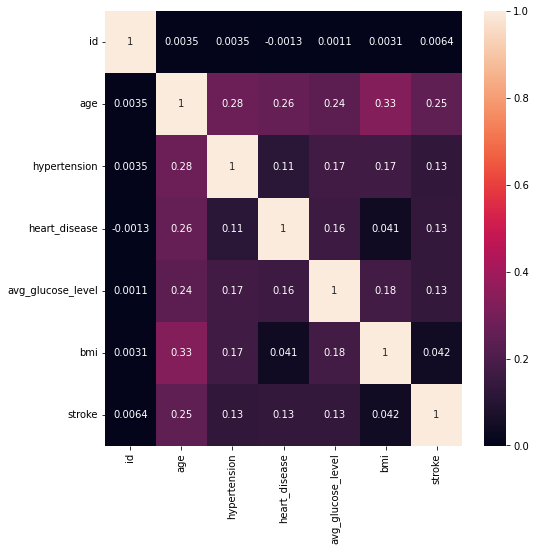

In [77]:
corr = df.corr()
plt.figure(figsize = (8,8))
sns.heatmap(corr, annot = True)

From the heatmap above:
*   All features have correlations.
*   It is clear that there is low correlation between Age and BMI
*   These correlations are not very strong.





In [78]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


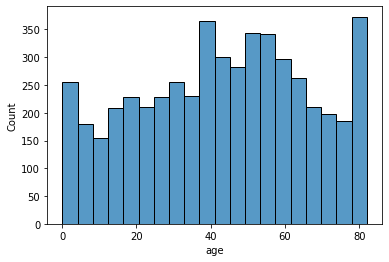

In [79]:
ax = sns.histplot(data = df, x = 'age')



*   The counts are very high between Age 40 to 80. 
*   Strokes are likely to happen between these age groups.



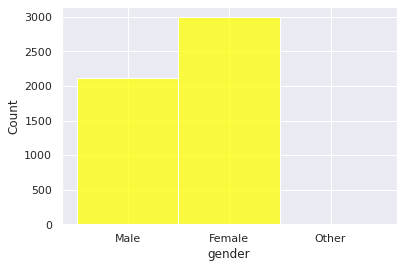

In [85]:
sns.set(style = 'darkgrid')
sns.histplot(data = df, x = 'gender', color = 'yellow')
plt.xlabel('gender');



*   Females are more likely to have stroke than males as per this histogram.
*   Females should be center of this analysis when it comes to gender.



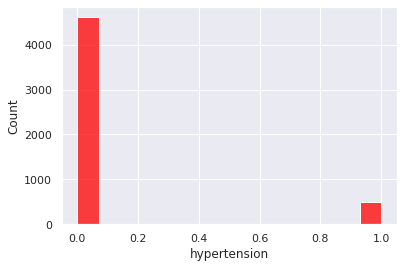

In [86]:
sns.set(style = 'darkgrid')
sns.histplot(data = df, x = 'hypertension', color = 'red')
plt.xlabel('hypertension');


*   The 0 represents patients who don't have hypertemsion and 1 represents patients who do have hypertension.
*   There are less patients with hypertension.


*   Patients with hypertension are morely to have stroke as compared to patients with no hypertension.





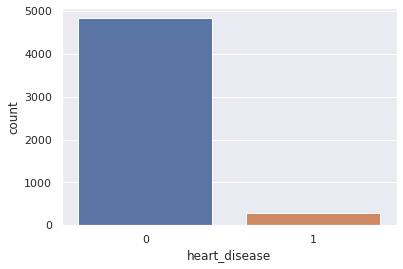

In [83]:
ax = sns.countplot(data = df, x = 'heart_disease');



*   0 reprsent patients with no heart disease. 1 represent patients with heart disease.
*   In this data, there are less patients with heart disease.

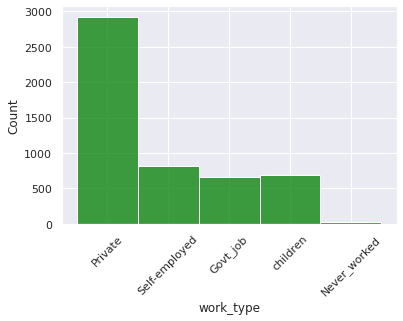

In [95]:
sns.set(style = 'darkgrid')
sns.histplot(data = df, x = 'work_type', color = 'green')
plt.xticks(rotation = 45 )
plt.xlabel('work_type');



*   The visuals represent 5 work types.
*   The analysis is based on these different natures of work. 



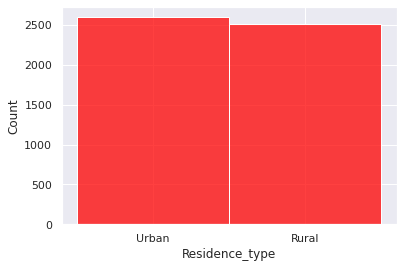

In [88]:
sns.set(style = 'darkgrid')
sns.histplot(data = df, x = 'Residence_type', color = 'red')
plt.xlabel('Residence_type');



*   There are two type of patients residence. One is Urban and the other is rural.
*   Counts of patients living in Urban are slightly higher than rural area. 





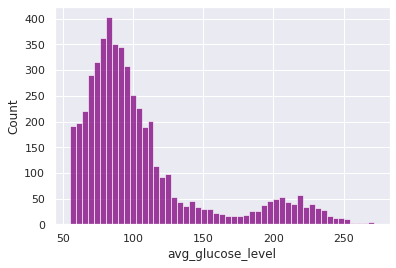

In [89]:
sns.set(style = 'darkgrid')
sns.histplot(data = df, x = 'avg_glucose_level', color = 'purple')
plt.xlabel('avg_glucose_level');



*   This graph shows variation in the average glucose level in the patients.
*   Counts are highest in the range between 50 and almost 150.



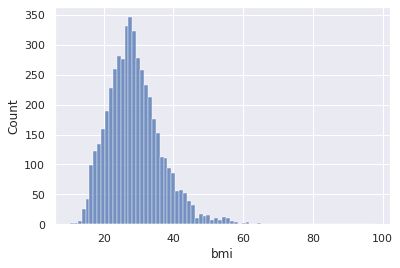

In [91]:
ax = sns.histplot(data = df, x = 'bmi')

*   This graph shows variation in bmi in the patients.
*   Counts are highest in the range between 20 and 40.


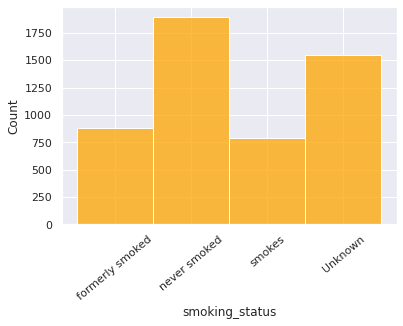

In [97]:
sns.set(style = 'darkgrid')
sns.histplot(data = df, x = 'smoking_status', color = 'orange')
plt.xticks(rotation = 40 )
plt.xlabel('smoking_status');



*   This graph shows the smoking status of different patients.
*   The prediction of getting a stroke are highest for patients who never smoke.

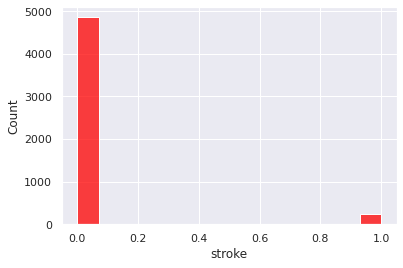

In [101]:
sns.set(style = 'darkgrid')
sns.histplot(data = df, x = 'stroke', color = 'red')
plt.xlabel('stroke');


*   Two kinds of patients are shown in this graph. 1 represents patients who had a stroke and 0 represents patients who did not have a stroke.
*   Clearly, there are more patients who had a stroke as compared to those who did not.

